# Instalasi library

In [ ]:
# Instal Tensorflow
!pip install transformers tensorflow nltk numpy opencv-python easyocr pytesseract
!sudo apt install tesseract-ocr
!pip install tensorflow==2.11

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 12.5 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2

In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y tesseract-ocr-ind # untuk bahasa Indonesia

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,627 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,458 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main

# Import Library

In [ ]:
import numpy as np
import pandas as pd
import json
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import easyocr
import re
import pytesseract
import cv2
from nltk.corpus import wordnet
from transformers import BertTokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout, Bidirectional, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model


# Dataset

In [ ]:
# Load dataset
# Dataset awal: Kalimat peringatan bahan alergen

texts = [
        "Produk ini mengandung kacang tanah",
        "Mengandung kacang tanah.",
        "Dapat menyebabkan alergi jika mengandung kacang tanah",
        "Alergen yang ditemukan adalah kacang tanah.",
        "Ada bahan alergen di produk ini: kacang tanah.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: kacang tanah.",
        "Bahan ini kacang tanah",
        "Mengandung kacang tanah, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah kacang tanah.",
        "Terdapat bahan alergen di dalamnya: kacang tanah.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi kacang tanah",
        "Produk ini mengandung kacang tanah, hati-hati bagi yang alergi kacang tanah.",
        "Kandungan utama dari produk ini adalah kacang tanah, yang bisa berbahaya bagi orang dengan intoleransi kacang tanah.",
        "Dapat menyebabkan reaksi alergi jika mengandung kacang tanah.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi kacang tanah.",
        "Mengandung kacang tanah, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap kacang tanah",
        "Makanan ini mengandung kacang tanah, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung kacang tanah, sangat berbahaya bagi penderita alergi kacang tanah.",
        "Mengandung kacang tanah, hati-hati bagi penderita alergi kacang tanah.",
        "Produk ini mengandung kacang tanah, jadi tidak cocok untuk orang yang alergi kacang tanah.",
        "Produk ini mengandung kacang almond",
        "Mengandung kacang almond.",
        "Dapat menyebabkan alergi jika mengandung kacang almond",
        "Alergen yang ditemukan adalah kacang almond.",
        "Ada bahan alergen di produk ini: kacang almond.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: kacang almond.",
        "Bahan ini kacang almond",
        "Mengandung kacang almond, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah kacang almond.",
        "Terdapat bahan alergen di dalamnya: kacang almond.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi kacang almond",
        "Produk ini mengandung kacang almond, hati-hati bagi yang alergi kacang almond.",
        "Kandungan utama dari produk ini adalah kacang almond, yang bisa berbahaya bagi orang dengan intoleransi kacang almond.",
        "Dapat menyebabkan reaksi alergi jika mengandung kacang almond.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi kacang almond.",
        "Mengandung kacang almond, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap kacang almond",
        "Makanan ini mengandung kacang almond, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung kacang almond, sangat berbahaya bagi penderita alergi kacang almond.",
        "Mengandung kacang almond, hati-hati bagi penderita alergi kacang almond.",
        "Produk ini mengandung kacang almond, jadi tidak cocok untuk orang yang alergi kacang almond.",
        "Produk ini mengandung kacang mete",
        "Mengandung kacang mete.",
        "Dapat menyebabkan alergi jika mengandung kacang mete",
        "Alergen yang ditemukan adalah kacang mete.",
        "Ada bahan alergen di produk ini: kacang mete.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: kacang mete.",
        "Bahan ini kacang mete",
        "Mengandung kacang mete, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah kacang mete.",
        "Terdapat bahan alergen di dalamnya: kacang mete.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi kacang mete",
        "Produk ini mengandung kacang mete, hati-hati bagi yang alergi kacang mete.",
        "Kandungan utama dari produk ini adalah kacang mete, yang bisa berbahaya bagi orang dengan intoleransi kacang mete.",
        "Dapat menyebabkan reaksi alergi jika mengandung kacang mete.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi kacang mete.",
        "Mengandung kacang mete, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap kacang mete",
        "Makanan ini mengandung kacang mete, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung kacang mete, sangat berbahaya bagi penderita alergi kacang mete.",
        "Mengandung kacang mete, hati-hati bagi penderita alergi kacang mete.",
        "Produk ini mengandung kacang mete, jadi tidak cocok untuk orang yang alergi kacang mete.",
        "Produk ini mengandung kacang hazelnut",
        "Mengandung kacang hazelnut.",
        "Dapat menyebabkan alergi jika mengandung kacang hazelnut",
        "Alergen yang ditemukan adalah kacang hazelnut.",
        "Ada bahan alergen di produk ini: kacang hazelnut.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: kacang hazelnut.",
        "Bahan ini kacang hazelnut",
        "Mengandung kacang hazelnut, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah kacang hazelnut.",
        "Terdapat bahan alergen di dalamnya: kacang hazelnut.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi kacang hazelnut",
        "Produk ini mengandung kacang hazelnut, hati-hati bagi yang alergi kacang hazelnut.",
        "Kandungan utama dari produk ini adalah kacang hazelnut, yang bisa berbahaya bagi orang dengan intoleransi kacang hazelnut.",
        "Dapat menyebabkan reaksi alergi jika mengandung kacang hazelnut.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi kacang hazelnut.",
        "Mengandung kacang hazelnut, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap kacang hazelnut",
        "Makanan ini mengandung kacang hazelnut, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung kacang hazelnut, sangat berbahaya bagi penderita alergi kacang hazelnut.",
        "Mengandung kacang hazelnut, hati-hati bagi penderita alergi kacang hazelnut.",
        "Produk ini mengandung kacang hazelnut, jadi tidak cocok untuk orang yang alergi kacang hazelnut.",
        "Produk ini mengandung pistachio",
        "Mengandung pistachio.",
        "Dapat menyebabkan alergi jika mengandung pistachio",
        "Alergen yang ditemukan adalah pistachio.",
        "Ada bahan alergen di produk ini: pistachio.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: pistachio.",
        "Bahan ini pistachio",
        "Mengandung pistachio, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah pistachio.",
        "Terdapat bahan alergen di dalamnya: pistachio.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi pistachio",
        "Produk ini mengandung pistachio, hati-hati bagi yang alergi pistachio.",
        "Kandungan utama dari produk ini adalah pistachio, yang bisa berbahaya bagi orang dengan intoleransi pistachio.",
        "Dapat menyebabkan reaksi alergi jika mengandung pistachio.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi pistachio.",
        "Mengandung pistachio, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap pistachio",
        "Makanan ini mengandung pistachio, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung pistachio, sangat berbahaya bagi penderita alergi pistachio.",
        "Mengandung pistachio, hati-hati bagi penderita alergi pistachio.",
        "Produk ini mengandung pistachio, jadi tidak cocok untuk orang yang alergi pistachio.",
        "Produk ini mengandung walnut",
        "Mengandung walnut.",
        "Dapat menyebabkan alergi jika mengandung walnut",
        "Alergen yang ditemukan adalah walnut.",
        "Ada bahan alergen di produk ini: walnut.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: walnut.",
        "Bahan ini walnut",
        "Mengandung walnut, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah walnut.",
        "Terdapat bahan alergen di dalamnya: walnut.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi walnut",
        "Produk ini mengandung walnut, hati-hati bagi yang alergi walnut.",
        "Kandungan utama dari produk ini adalah walnut, yang bisa berbahaya bagi orang dengan intoleransi walnut.",
        "Dapat menyebabkan reaksi alergi jika mengandung walnut.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi walnut.",
        "Mengandung walnut, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap walnut",
        "Makanan ini mengandung walnut, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung walnut, sangat berbahaya bagi penderita alergi walnut.",
        "Mengandung walnut, hati-hati bagi penderita alergi walnut.",
        "Produk ini mengandung walnut, jadi tidak cocok untuk orang yang alergi walnut.",
        "Produk ini mengandung pecan",
        "Mengandung pecan.",
        "Dapat menyebabkan alergi jika mengandung pecan",
        "Alergen yang ditemukan adalah pecan.",
        "Ada bahan alergen di produk ini: pecan.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: pecan.",
        "Bahan ini pecan",
        "Mengandung pecan, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah pecan.",
        "Terdapat bahan alergen di dalamnya: pecan.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi pecan",
        "Produk ini mengandung pecan, hati-hati bagi yang alergi pecan.",
        "Kandungan utama dari produk ini adalah pecan, yang bisa berbahaya bagi orang dengan intoleransi pecan.",
        "Dapat menyebabkan reaksi alergi jika mengandung pecan.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi pecan.",
        "Mengandung pecan, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap pecan",
        "Makanan ini mengandung pecan, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung pecan, sangat berbahaya bagi penderita alergi pecan.",
        "Mengandung pecan, hati-hati bagi penderita alergi pecan.",
        "Produk ini mengandung pecan, jadi tidak cocok untuk orang yang alergi pecan.",
        "Produk ini mengandung susu sapi",
        "Mengandung susu sapi.",
        "Dapat menyebabkan alergi jika mengandung susu sapi",
        "Alergen yang ditemukan adalah susu sapi.",
        "Ada bahan alergen di produk ini: susu sapi.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: susu sapi.",
        "Bahan ini susu sapi",
        "Mengandung susu sapi, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah susu sapi.",
        "Terdapat bahan alergen di dalamnya: susu sapi.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi susu sapi",
        "Produk ini mengandung susu sapi, hati-hati bagi yang alergi susu sapi.",
        "Kandungan utama dari produk ini adalah susu sapi, yang bisa berbahaya bagi orang dengan intoleransi susu sapi.",
        "Dapat menyebabkan reaksi alergi jika mengandung susu sapi.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi susu sapi.",
        "Mengandung susu sapi, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap susu sapi",
        "Makanan ini mengandung susu sapi, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung susu sapi, sangat berbahaya bagi penderita alergi susu sapi.",
        "Mengandung susu sapi, hati-hati bagi penderita alergi susu sapi.",
        "Produk ini mengandung susu sapi, jadi tidak cocok untuk orang yang alergi susu sapi.",
        "Produk ini mengandung susu kambing",
        "Mengandung susu kambing.",
        "Dapat menyebabkan alergi jika mengandung susu kambing",
        "Alergen yang ditemukan adalah susu kambing.",
        "Ada bahan alergen di produk ini: susu kambing.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: susu kambing.",
        "Bahan ini susu kambing",
        "Mengandung susu kambing, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah susu kambing.",
        "Terdapat bahan alergen di dalamnya: susu kambing.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi susu kambing",
        "Produk ini mengandung susu kambing, hati-hati bagi yang alergi susu kambing.",
        "Kandungan utama dari produk ini adalah susu kambing, yang bisa berbahaya bagi orang dengan intoleransi susu kambing.",
        "Dapat menyebabkan reaksi alergi jika mengandung susu kambing.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi susu kambing.",
        "Mengandung susu kambing, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap susu kambing",
        "Makanan ini mengandung susu kambing, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung susu kambing, sangat berbahaya bagi penderita alergi susu kambing.",
        "Mengandung susu kambing, hati-hati bagi penderita alergi susu kambing.",
        "Produk ini mengandung susu kambing, jadi tidak cocok untuk orang yang alergi susu kambing.",
        "Produk ini mengandung telur",
        "Mengandung telur.",
        "Dapat menyebabkan alergi jika mengandung telur",
        "Alergen yang ditemukan adalah telur.",
        "Ada bahan alergen di produk ini: telur.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: telur.",
        "Bahan ini telur",
        "Mengandung telur, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah telur.",
        "Terdapat bahan alergen di dalamnya: telur.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi telur",
        "Produk ini mengandung telur, hati-hati bagi yang alergi telur.",
        "Kandungan utama dari produk ini adalah telur, yang bisa berbahaya bagi orang dengan intoleransi telur.",
        "Dapat menyebabkan reaksi alergi jika mengandung telur.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi telur.",
        "Mengandung telur, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap telur",
        "Makanan ini mengandung telur, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung telur, sangat berbahaya bagi penderita alergi telur.",
        "Mengandung telur, hati-hati bagi penderita alergi telur.",
        "Produk ini mengandung telur, jadi tidak cocok untuk orang yang alergi telur.",
        "Produk ini mengandung susu",
        "Mengandung susu.",
        "Dapat menyebabkan alergi jika mengandung susu",
        "Alergen yang ditemukan adalah susu.",
        "Ada bahan alergen di produk ini: susu.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: susu.",
        "Bahan ini susu",
        "Mengandung susu, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah susu.",
        "Terdapat bahan alergen di dalamnya: susu.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi susu",
        "Produk ini mengandung susu, hati-hati bagi yang alergi susu.",
        "Kandungan utama dari produk ini adalah susu, yang bisa berbahaya bagi orang dengan intoleransi susu.",
        "Dapat menyebabkan reaksi alergi jika mengandung susu.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi susu.",
        "Mengandung susu, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap susu",
        "Makanan ini mengandung susu, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung susu, sangat berbahaya bagi penderita alergi susu.",
        "Mengandung susu, hati-hati bagi penderita alergi susu.",
        "Produk ini mengandung susu, jadi tidak cocok untuk orang yang alergi susu.",
        "Produk ini mengandung udang",
        "Mengandung udang.",
        "Dapat menyebabkan alergi jika mengandung udang",
        "Alergen yang ditemukan adalah udang.",
        "Ada bahan alergen di produk ini: udang.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: udang.",
        "Bahan ini udang",
        "Mengandung udang, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah udang.",
        "Terdapat bahan alergen di dalamnya: udang.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi udang",
        "Produk ini mengandung udang, hati-hati bagi yang alergi udang.",
        "Kandungan utama dari produk ini adalah udang, yang bisa berbahaya bagi orang dengan intoleransi udang.",
        "Dapat menyebabkan reaksi alergi jika mengandung udang.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi udang.",
        "Mengandung udang, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap udang",
        "Makanan ini mengandung udang, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung udang, sangat berbahaya bagi penderita alergi udang.",
        "Mengandung udang, hati-hati bagi penderita alergi udang.",
        "Produk ini mengandung udang, jadi tidak cocok untuk orang yang alergi udang.",
        "Produk ini mengandung kedelai",
        "Mengandung kedelai.",
        "Dapat menyebabkan alergi jika mengandung kedelai",
        "Alergen yang ditemukan adalah kedelai.",
        "Ada bahan alergen di produk ini: kedelai.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: kedelai.",
        "Bahan ini kedelai",
        "Mengandung kedelai, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah kedelai.",
        "Terdapat bahan alergen di dalamnya: kedelai.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi kedelai",
        "Produk ini mengandung kedelai, hati-hati bagi yang alergi kedelai.",
        "Kandungan utama dari produk ini adalah kedelai, yang bisa berbahaya bagi orang dengan intoleransi kedelai.",
        "Dapat menyebabkan reaksi alergi jika mengandung kedelai.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi kedelai.",
        "Mengandung kedelai, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap kedelai",
        "Makanan ini mengandung kedelai, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung kedelai, sangat berbahaya bagi penderita alergi kedelai.",
        "Mengandung kedelai, hati-hati bagi penderita alergi kedelai.",
        "Produk ini mengandung kedelai, jadi tidak cocok untuk orang yang alergi kedelai.",
        "Produk ini mengandung ikan salmon",
        "Mengandung ikan salmon.",
        "Dapat menyebabkan alergi jika mengandung ikan salmon",
        "Alergen yang ditemukan adalah ikan salmon.",
        "Ada bahan alergen di produk ini: ikan salmon.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: ikan salmon.",
        "Bahan ini ikan salmon",
        "Mengandung ikan salmon, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah ikan salmon.",
        "Terdapat bahan alergen di dalamnya: ikan salmon.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi ikan salmon",
        "Produk ini mengandung ikan salmon, hati-hati bagi yang alergi ikan salmon.",
        "Kandungan utama dari produk ini adalah ikan salmon, yang bisa berbahaya bagi orang dengan intoleransi ikan salmon.",
        "Dapat menyebabkan reaksi alergi jika mengandung ikan salmon.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi ikan salmon.",
        "Mengandung ikan salmon, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap ikan salmon",
        "Makanan ini mengandung ikan salmon, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung ikan salmon, sangat berbahaya bagi penderita alergi ikan salmon.",
        "Mengandung ikan salmon, hati-hati bagi penderita alergi ikan salmon.",
        "Produk ini mengandung ikan salmon, jadi tidak cocok untuk orang yang alergi ikan salmon.",
        "Produk ini mengandung ikan tuna",
        "Mengandung ikan tuna.",
        "Dapat menyebabkan alergi jika mengandung ikan tuna",
        "Alergen yang ditemukan adalah ikan tuna.",
        "Ada bahan alergen di produk ini: ikan tuna.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: ikan tuna.",
        "Bahan ini ikan tuna",
        "Mengandung ikan tuna, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah ikan tuna.",
        "Terdapat bahan alergen di dalamnya: ikan tuna.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi ikan tuna",
        "Produk ini mengandung ikan tuna, hati-hati bagi yang alergi ikan tuna.",
        "Kandungan utama dari produk ini adalah ikan tuna, yang bisa berbahaya bagi orang dengan intoleransi ikan tuna.",
        "Dapat menyebabkan reaksi alergi jika mengandung ikan tuna.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi ikan tuna.",
        "Mengandung ikan tuna, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap ikan tuna",
        "Makanan ini mengandung ikan tuna, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung ikan tuna, sangat berbahaya bagi penderita alergi ikan tuna.",
        "Mengandung ikan tuna, hati-hati bagi penderita alergi ikan tuna.",
        "Produk ini mengandung ikan tuna, jadi tidak cocok untuk orang yang alergi ikan tuna.",
        "Produk ini mengandung laktosa",
        "Mengandung laktosa.",
        "Dapat menyebabkan alergi jika mengandung laktosa",
        "Alergen yang ditemukan adalah laktosa.",
        "Ada bahan alergen di produk ini: laktosa.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: laktosa.",
        "Bahan ini laktosa",
        "Mengandung laktosa, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah laktosa.",
        "Terdapat bahan alergen di dalamnya: laktosa.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi laktosa",
        "Produk ini mengandung laktosa, hati-hati bagi yang alergi laktosa.",
        "Kandungan utama dari produk ini adalah laktosa, yang bisa berbahaya bagi orang dengan intoleransi laktosa.",
        "Dapat menyebabkan reaksi alergi jika mengandung laktosa.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi laktosa.",
        "Mengandung laktosa, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap laktosa",
        "Makanan ini mengandung laktosa, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung laktosa, sangat berbahaya bagi penderita alergi laktosa.",
        "Mengandung laktosa, hati-hati bagi penderita alergi laktosa.",
        "Produk ini mengandung laktosa, jadi tidak cocok untuk orang yang alergi laktosa.",
        "Produk ini mengandung gluten",
        "Mengandung gluten.",
        "Dapat menyebabkan alergi jika mengandung gluten",
        "Alergen yang ditemukan adalah gluten.",
        "Ada bahan alergen di produk ini: gluten.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: gluten.",
        "Bahan ini gluten",
        "Mengandung gluten, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah gluten.",
        "Terdapat bahan alergen di dalamnya: gluten.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi gluten",
        "Produk ini mengandung gluten, hati-hati bagi yang alergi gluten.",
        "Kandungan utama dari produk ini adalah gluten, yang bisa berbahaya bagi orang dengan intoleransi gluten.",
        "Dapat menyebabkan reaksi alergi jika mengandung gluten.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi gluten.",
        "Mengandung gluten, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap gluten",
        "Makanan ini mengandung gluten, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung gluten, sangat berbahaya bagi penderita alergi gluten.",
        "Mengandung gluten, hati-hati bagi penderita alergi gluten.",
        "Produk ini mengandung gluten, jadi tidak cocok untuk orang yang alergi gluten.",
        "Produk ini mengandung whey",
        "Mengandung whey.",
        "Dapat menyebabkan alergi jika mengandung whey",
        "Alergen yang ditemukan adalah whey.",
        "Ada bahan alergen di produk ini: whey.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: whey.",
        "Bahan ini whey",
        "Mengandung whey, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah whey.",
        "Terdapat bahan alergen di dalamnya: whey.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi whey",
        "Produk ini mengandung whey, hati-hati bagi yang alergi whey.",
        "Kandungan utama dari produk ini adalah whey, yang bisa berbahaya bagi orang dengan intoleransi whey.",
        "Dapat menyebabkan reaksi alergi jika mengandung whey.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi whey.",
        "Mengandung whey, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap whey",
        "Makanan ini mengandung whey, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung whey, sangat berbahaya bagi penderita alergi whey.",
        "Mengandung whey, hati-hati bagi penderita alergi whey.",
        "Produk ini mengandung whey, jadi tidak cocok untuk orang yang alergi whey.",
        "Produk ini mengandung tepung terigu",
        "Mengandung tepung terigu.",
        "Dapat menyebabkan alergi jika mengandung tepung terigu",
        "Alergen yang ditemukan adalah tepung terigu.",
        "Ada bahan alergen di produk ini: tepung terigu.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: tepung terigu.",
        "Bahan ini tepung terigu",
        "Mengandung tepung terigu, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah tepung terigu.",
        "Terdapat bahan alergen di dalamnya: tepung terigu.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi tepung terigu",
        "Produk ini mengandung tepung terigu, hati-hati bagi yang alergi tepung terigu.",
        "Kandungan utama dari produk ini adalah tepung terigu, yang bisa berbahaya bagi orang dengan intoleransi tepung terigu.",
        "Dapat menyebabkan reaksi alergi jika mengandung tepung terigu.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi tepung terigu.",
        "Mengandung tepung terigu, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap tepung terigu",
        "Makanan ini mengandung tepung terigu, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung tepung terigu, sangat berbahaya bagi penderita alergi tepung terigu.",
        "Mengandung tepung terigu, hati-hati bagi penderita alergi tepung terigu.",
        "Produk ini mengandung tepung terigu, jadi tidak cocok untuk orang yang alergi tepung terigu.",
        "Produk ini mengandung ikan",
        "Mengandung ikan.",
        "Dapat menyebabkan alergi jika mengandung ikan",
        "Alergen yang ditemukan adalah ikan.",
        "Ada bahan alergen di produk ini: ikan.",
        "Mengandung alergen, lihat daftar bahan yang dicetak tebal: ikan.",
        "Bahan ini ikan",
        "Mengandung ikan, hati-hati bagi yang alergi.",
        "Alergen yang ditemukan adalah ikan.",
        "Terdapat bahan alergen di dalamnya: ikan.",
        "Mengandung bahan yang dapat menyebabkan alergi pada penderita alergi ikan",
        "Produk ini mengandung ikan, hati-hati bagi yang alergi ikan.",
        "Kandungan utama dari produk ini adalah ikan, yang bisa berbahaya bagi orang dengan intoleransi ikan.",
        "Dapat menyebabkan reaksi alergi jika mengandung ikan.",
        "Produk ini mengandung bahan yang bisa memicu alergi pada penderita alergi ikan.",
        "Mengandung ikan, mungkin berbahaya bagi penderita alergi.",
        "Dapat memicu reaksi alergi pada orang yang sensitif terhadap ikan",
        "Makanan ini mengandung ikan, jadi tidak cocok untuk mereka yang alergi.",
        "Produk ini mengandung ikan, sangat berbahaya bagi penderita alergi ikan.",
        "Mengandung ikan, hati-hati bagi penderita alergi ikan.",
        "Produk ini mengandung ikan, jadi tidak cocok untuk orang yang alergi ikan.",
        "Tidak mengandung bahan alergen.",
        "Tidak ada bahan yang mengandung alergen.",
        "Tidak ada kandungan bahan yang bisa menyebabkan alergi.",
        "Bebas dari susu, telur, dan kacang.",
        "Makanan ini bebas dari gluten, telur, dan kacang.",
        "Produk ini mengandung kacang, susu, dan gluten.",
]

labels = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang tanah
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang almond
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang mete
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Kacang hazelnut
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pistachio
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Walnut
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pecan
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu sapi
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu kambing
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # telur
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # susu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # udang
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # kedelai
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # ikan salmon
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ikan tuna
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # laktosa
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # gluten
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # whey
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # tepung terigu
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # ikan
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], #susu, gluten
])

#texts = pd.DataFrame(text)
#labels = pd.DataFrame(label)

# Simpan dataset ke file CSV
# texts.to_csv("texts.csv", index=False)
# labels.to_csv("labels.csv", index=False)

# # Load dataset untuk preprocessing
# texts = pd.read_csv("texts.csv")
# labels = pd.read_csv("labels.csv")

# Preprocessing Data

In [ ]:
# Fungsi untuk pengacakan kata
def shuffle_words(text):
    words = text.split()
    random.shuffle(words)
    return " ".join(words)

# Fungsi untuk penghapusan kata
def delete_words(text, delete_prob=0.2):
    words = text.split()
    new_words = [word for word in words if random.random() > delete_prob]
    return " ".join(new_words)

# Fungsi untuk penyisipan kata
def insert_words(text, insert_prob=0.2, insert_words=["dan", "juga", "serta"]):
    words = text.split()
    new_words = words[:]
    for i in range(len(words)):
        if random.random() < insert_prob:
            new_words.insert(i, random.choice(insert_words))
    return " ".join(new_words)

In [ ]:
# Pastikan WordNet sudah diunduh untuk data augmentasi
import nltk
nltk.download('wordnet')

def augment_text(text, n=1, probability=0.5):
    words = text.split()
    augmented_texts = []

    for _ in range(n):  # Ulangi augmentasi untuk menghasilkan beberapa variasi
        new_words = words.copy()
        for idx in range(len(new_words)):
            if random.random() < probability:  # Probabilitas augmentasi
                synonyms = [syn.lemmas()[0].name() for syn in wordnet.synsets(new_words[idx])]
                if synonyms:
                    synonym = random.choice(synonyms)
                    if synonym != new_words[idx]:  # Hanya ganti jika sinonim berbeda
                        new_words[idx] = synonym
        augmented_texts.append(" ".join(new_words))

    return augmented_texts



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Augmentasi data secara umum
augmented_texts = []
augmented_labels = []

for text, label in zip(texts, labels):
    augmented_texts.append(shuffle_words(text))
    augmented_texts.append(delete_words(text))
    augmented_texts.append(insert_words(text))

    augmented_labels.extend([label] * 3)

texts.extend(augmented_texts)
labels = np.vstack([labels, augmented_labels])

In [ ]:
# Tokenisasi dan padding
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)  # Fit tokenizer pada data yang telah diaugmentasi
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')

# Konversi label menjadi array numpy
y = np.array(labels)

min_length = min(len(X), len(y))
X = X[:min_length]
y = y[:min_length]

# Split data menjadi training dan validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Multi-Layer Perceptron (MLP)

In [ ]:
model = Sequential([
    Embedding(input_dim=1000, output_dim=128, input_length=50),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(20, activation='sigmoid', kernel_regularizer='l2')

])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 128)           128000    
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                409664    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                1300      
                                                                 
Total params: 538,964
Trainable params: 538,964
Non-trainable params: 0
_________________________________________________________________


# Melatih model

In [ ]:
# Training model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=4,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
341/341 [==============================] - 6s 16ms/step - loss: 0.3469 - accuracy: 0.0668 - val_loss: 0.2346 - val_accuracy: 0.1525
Epoch 2/50
341/341 [==============================] - 2s 7ms/step - loss: 0.2175 - accuracy: 0.1981 - val_loss: 0.1823 - val_accuracy: 0.4721
Epoch 3/50
341/341 [==============================] - 2s 6ms/step - loss: 0.1663 - accuracy: 0.4784 - val_loss: 0.1380 - val_accuracy: 0.7478
Epoch 4/50
341/341 [==============================] - 2s 6ms/step - loss: 0.1289 - accuracy: 0.6919 - val_loss: 0.1064 - val_accuracy: 0.8299
Epoch 5/50
341/341 [==============================] - 2s 6ms/step - loss: 0.1036 - accuracy: 0.8034 - val_loss: 0.0860 - val_accuracy: 0.9120
Epoch 6/50
341/341 [==============================] - 2s 6ms/step - loss: 0.0885 - accuracy: 0.8489 - val_loss: 0.0713 - val_accuracy: 0.9032
Epoch 7/50
341/341 [==============================] - 3s 9ms/step - loss: 0.0758 - accuracy: 0.8863 - val_loss: 0.0607 - val_accuracy: 0.9179
Epoch

# Evaluasi model

In [ ]:
y_pred = model.predict(X_val)
y_pred_binary = (y_pred > 0.5).astype(int)

# Cetak classification report
from sklearn.metrics import classification_report
allergen_labels = ["Kacang Tanah", "Kacang Almond", "Kacang Mete", "Kacang Hazelnut", "Pistachio", "Walnut", "Pecan", "Susu Sapi",
"Susu Kambing", "Telur", "Susu", "Udang", "Kedelai", "Ikan Salmon", "Ikan Tuna", "Laktosa", "Gluten", "Whey", "Tepung Terigu", "Ikan"]
print("\nClassification Report:")
print(classification_report(y_val, y_pred_binary, target_names=allergen_labels))

11/11 [==============================] - 0s 2ms/step

Classification Report:
                 precision    recall  f1-score   support

   Kacang Tanah       1.00      0.89      0.94        18
  Kacang Almond       1.00      1.00      1.00        17
    Kacang Mete       1.00      0.96      0.98        24
Kacang Hazelnut       1.00      1.00      1.00        16
      Pistachio       1.00      1.00      1.00        16
         Walnut       1.00      0.89      0.94        18
          Pecan       1.00      1.00      1.00        14
      Susu Sapi       1.00      1.00      1.00         9
   Susu Kambing       1.00      1.00      1.00        19
          Telur       1.00      1.00      1.00        15
           Susu       1.00      0.89      0.94        19
          Udang       1.00      0.95      0.97        19
        Kedelai       1.00      0.95      0.98        22
    Ikan Salmon       1.00      1.00      1.00        12
      Ikan Tuna       0.87      0.93      0.90        14
        La

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


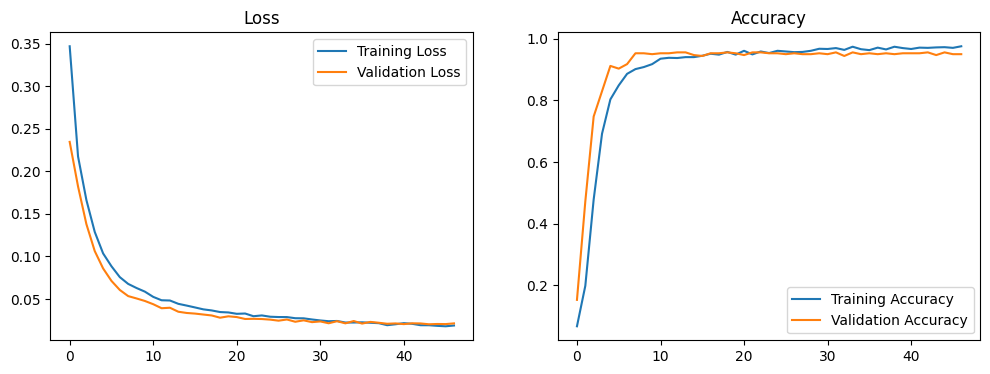

In [ ]:
# Plot training & validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


# Menyimpan model

In [ ]:
# Menyimpan model ke file .h5
model.save('model_alergify.h5')

# Ekstraksi teks dengan OCR-EasyOCR

In [ ]:
def extract_text_from_image(image_path):
    reader = easyocr.Reader(['id'])  # bahasa Indonesia
    results = reader.readtext(image_path, detail=0)
    return " ".join(results)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # menghapus tanda baca
    return text

# Load model pre-trained
model = load_model('model_alergify.h5')

def predict_allergens(text, tokenizer, max_length):
    sequences = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen=max_length, padding='post')
    predictions = model.predict(padded)
    return predictions

def pipeline(image_path, tokenizer, max_length):
    raw_text = extract_text_from_image(image_path)
    cleaned_text = preprocess_text(raw_text)
    predictions = predict_allergens(cleaned_text, tokenizer, max_length=50)

    # Daftar alergen
    allergens = ["Kacang Tanah", "Kacang Almond", "Kacang Mete", "Kacang Hazelnut",
                 "Pistachio", "Walnut", "Pecan", "Susu Sapi", "Susu Kambing",
                "Telur", "Susu", "Udang", "Kedelai", "Ikan Salmon",
                "Ikan Tuna", "Laktosa", "Gluten", "Whey", "Tepung Terigu", "Ikan"]
    detected = [allergens[i] for i, prob in enumerate(predictions[0]) if prob > 0.5]
    return detected

In [ ]:
# Contoh penggunaan
# # catatan: image path berasal dari masing-masing user
image_path = '/content/WhatsApp Image 2024-12-07 at 18.22.15 (1).jpeg'

extracted_text = extract_text_from_image(image_path)
print(f"Teks yang diekstrak: {extracted_text}")

# Prediksi dengan integrasi OCR dan model tensorflow
detected_allergens = pipeline(image_path, tokenizer, max_length=50)
print("Alergen yang terdeteksi:", detected_allergens)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteTeks yang diekstrak: INFORMASI NILAI GIZI Komposisl: Air; Cokelat Pelapis 24% , Takaran Seji: 65 (ml) Gula; Padatan Susu 6.7%, Minyak Sajian per Kemasan Nabati, Butiran Kacang 3.1% , JUMLAH PER SAJIAN Maltodekstrin Glukosa; Penstabil Energl Total 130 kkal Energl dari Lemak 80 kkal Nabati; Pengemulsi Nabati , Perisa Sintetik Vanila, Pewama Sintetk Lemak Total %AKCI (Tartrazin CI No 19140, Kuning FCF Kolesterol 0 CINo.15985) Lemak trans 0 9 Tanpa Pengawet Lemak tidak Jenuh tunggal 1 g 83 Lemak tidak jenuh ganda 9 9 Mengandung alergen; lihat daftar Lemak Jenuh 9 35 % bahan yang dicetak tebal. Protein 9 3 Dapat mengandung lesitin kedelai , 8 Kareonidemg Total ł 9 % kacang-kacangan; telur; dan gluten 2 Gula pangan 9 3 % 8 1999999129402 Garam (Natrium) 29 mg 2 % 2 "Porson AKGbordasarkan kobutuhun onorgi 2150kkal Kebutuhan energi Ande mungkin leblh (Inggi atau lebih rondeh. Ge 0*8vun 02 aguna : Sirup mg ~nX 75529954

# Ekstraksi teks dengan OCR-OpenCV

In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Path ke Tesseract OCR


def extract_text_from_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray)
    return text


model = load_model('model_alergify.h5')

tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(["contoh teks untuk pelatihan"])


def predict_allergens(text, threshold=0.5):
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=50, padding='post')
    prediction = model.predict(padded_seq)

    # Daftar alergen
    allergens = ["Kacang Tanah", "Kacang Almond", "Kacang Mete", "Kacang Hazelnut",
                 "Pistachio", "Walnut", "Pecan", "Susu Sapi", "Susu Kambing",
                "Telur", "Susu", "Udang", "Kedelai", "Ikan Salmon",
                "Ikan Tuna", "Laktosa", "Gluten", "Whey", "Tepung Terigu", "Ikan"]
    detected_allergens = [allergens[i] for i in range(len(prediction[0])) if prediction[0][i] > threshold]
    return detected_allergens


In [ ]:
# Contoh penggunaan
# # catatan: image path berasal dari masing-masing user
image_path = '/content/WhatsApp Image 2024-12-07 at 18.22.15 (1).jpeg'

extracted_text = extract_text_from_image(image_path)
print(f"Teks yang diekstrak: {extracted_text}")

# Prediksi
detected_allergens = predict_allergens(extracted_text)
print(f"Alergen yang terdeteksi: {detected_allergens}")

Teks yang diekstrak:  

  
 
 
 
 
 

     

es ag

4%

INFORMASI NILAI GIZI WOT Mee Cle aCe
P Se CER TCC Ic lS CR ia al ate
akaran Saji: 65 (mi) - =, x
4" Sajian per Kemasan Nabati, Butiran Kacang 3.1%, ,
Maitodekstrin, Sirup Glukosa, Penstabil

SHargeT 190 sic Energi dari Lemak 80 kkal Nabati, Pengemulsi po

a - = STi CL LAMM eda la sta ciel 2
ae (Tartrazin Cl.No.19140, Kuning FCF

0% Cl:No.15985).
Tanpa Pengawet.

 
 
 
 

Lemak Total
Kolesterol
Lemak trans

 
 

a

 
 
  

Lemak tidak jenuh tunggal
Lemak tidak jenuh ganda

Lemak Jenuh

Protein

Karbohidrat Total
Serat.pangan

Gulia

Garam (Natrium)

"Persen AKG berdasarkan kebutuhan energi.2150-kka
Kebutuhan energi Anda mungkin lebih tinggi atau lebih rendah.

Mengandung alergen, lihat daftar
bahan yang dicetak tebal:

Dapat mengandung lesitin kedela
kacang-kacangan, telur, dan gluten

oUt eit

  
   
 
 

_
C-HNANO820 ow

   

DO0o20ca 30

 

  

1/1 [==============================] - 0s 85ms/step
Alergen yang terdeteksi: []


# Contoh input manual

In [ ]:
# Contoh input teks
input_text = "Produk ini mengandung kacang tanah."

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequence = tokenizer.texts_to_sequences([input_text])
padded_sequence = pad_sequences(sequence, maxlen=100, padding='post')

predictions = model.predict(padded_sequence)

# Threshold interpretasi (misal untuk multi-label classification)
threshold = 0.5
predicted_classes = (predictions > threshold).astype(int)
print("Kelas Terdeteksi:", predicted_classes)

# 1: mengandung alergen, 0: tidak
# Kelas : ["Kacang Tanah", "Kacang Almond", "Kacang Mete", "Kacang Hazelnut", "Pistachio", "Walnut",
#          "Pecan", "Susu Sapi", "Susu Kambing","Telur", "Susu", "Udang", "Kedelai", "Ikan Salmon",
#          "Ikan Tuna", "Laktosa", "Gluten", "Whey", "Tepung Terigu", "Ikan"]

1/1 [==============================] - 0s 50ms/step
Kelas Terdeteksi: [[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
